<a href="https://colab.research.google.com/github/romeofx/Customer-Segmentation-and-Churn-Prediction-using-Machine-Learning/blob/main/BAN6440_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation and Churn Prediction using Machine Learning

**Name**: Calistus Chukwuebuka Ndubuisi  
**Class**: BAN6440 - Applied Machine Learning for Analytics  
**Date**: December 23, 2024

## Overview
This project applies machine learning to segment customers and predict churn, enabling targeted marketing and customer retention strategies. Using the **Online Retail II Dataset**, we built a customer segmentation model using **RFM analysis** and KMeans clustering, followed by an Artificial Neural Network (ANN) for churn prediction.

---

## Steps in the Project

### 1. Problem Statement
Businesses need to identify high-value customers and predict churn to optimize marketing strategies and enhance customer retention.

### 2. Data Collection
Dataset: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
Description: Transactional data of a UK-based online retail store.

---

### 3. Data Cleaning and Preprocessing
- Handled missing values by dropping rows without `Customer ID`.
- Created a `TotalPrice` feature (`Quantity * Price`) to calculate purchase values.
- Removed invalid or negative transactions.

---

### 4. Feature Engineering: RFM Analysis
- **Recency**: Days since the customer's last transaction.
- **Frequency**: Total number of transactions per customer.
- **Monetary**: Total amount spent by the customer.

---

### 5. Clustering with KMeans
- **Log Transformation**: Reduced skewness in RFM features.
- **Standardization**: Scaled features for clustering.
- **KMeans**: Grouped customers into 4 clusters.
- **Silhouette Score**: Evaluated clustering quality (score: 0.62).

---

### 6. ANN Model for Churn Prediction
- **Oversampling with SMOTE**: Balanced the dataset to address class imbalance.
- **ANN Architecture**:
  - Input: 64 neurons, `relu` activation.
  - Hidden Layers: 32 neurons, dropout layers.
  - Output: 4 neurons (softmax activation for multi-class classification).
- **Performance**:
  - Accuracy: 98%
  - Loss: 0.22

---

### 7. Visualizations
#### **Customer Clusters**
![Clusters of Customers](#)
- Visualized clusters using Recency and Monetary features.
- Interpretation: Cluster 0 represents high-value customers.

#### **Training History**
![Training Accuracy and Loss](#)
- Training and validation accuracy/loss tracked over 100 epochs.
- Interpretation: Model converged effectively, minimal overfitting observed.

---

## Insights
1. **Cluster 0**: High-value customers with frequent purchases. Focus on retention and loyalty programs.
2. **Cluster 3**: Infrequent but high-spending customers. Target with exclusive offers.
3. ANN predictions enable identifying potential churners early, preventing revenue loss.

---

## Recommendations
1. Implement personalized campaigns based on cluster characteristics.
2. Use churn predictions to proactively engage at-risk customers.
3. Explore feature engineering and advanced models to further enhance performance.

---

## Tools and Libraries
- Python: pandas, numpy, matplotlib, seaborn, scikit-learn, TensorFlow
- Dataset Source: [https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Dense, Dropout, Input

# Step 1: Load Dataset

In [ ]:
file_path = r'C:\Users\HP\Downloads\online_retail_II.csv'
data = pd.read_csv(file_path)

# Step 2: Data Exploration

In [ ]:
print("Top 20 rows of the dataset:")
print(data.head(20))

Top 20 rows of the dataset:
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLAC

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


In [ ]:
# Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


# Step 3: Data Cleaning and Preprocessing

In [ ]:
print("\nCleaning Data...")
data.dropna(subset=['Customer ID'], inplace=True)  # Drop rows without Customer ID
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalPrice'] = data['Quantity'] * data['Price']
data = data[data['TotalPrice'] > 0]  # Remove negative or zero purchases


Cleaning Data...


In [ ]:
# Display missing values after cleaning
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64


# Step 4 Feature Engineering: RFM (Recency, Frequency, Monetary)

In [ ]:
print("\nCreating RFM Features...")

# Define the current date for recency calculation
current_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Perform aggregation
rfm_data = data.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('InvoiceDate', 'count'),  # Frequency (using count of InvoiceDate as a proxy)
    Monetary=('TotalPrice', 'sum')      # Monetary
).reset_index()


Creating RFM Features...


# Step 5 Log Transformation for Skewed Data

In [ ]:
# Log Transformation for Skewed Data
rfm_data[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_data[['Recency', 'Frequency', 'Monetary']])

print("RFM Features Created Successfully!")
print(rfm_data.head())

RFM Features Created Successfully!
   Customer ID   Recency  Frequency   Monetary
0      12346.0  5.789960   3.555348  11.258774
1      12347.0  1.098612   5.537334   8.636632
2      12348.0  4.330733   3.951244   7.611051
3      12349.0  2.995732   5.170484   8.396085
4      12350.0  5.739793   2.890372   5.815324


# Step 6 Standardize Data

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Step 7 Exploratory Data Analysis (EDA)


Visualizing RFM Features...


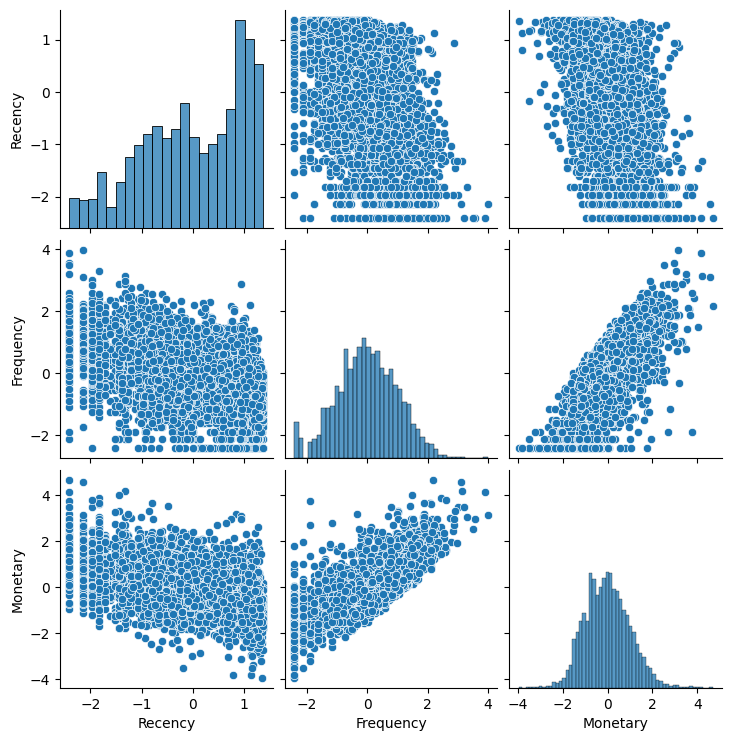

In [ ]:
print("\nVisualizing RFM Features...")
sns.pairplot(pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary']))
plt.show()

# Step 8 Apply KMeans Clustering

In [ ]:
print("\nApplying KMeans Clustering...")
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Evaluate Clustering
silhouette_avg = silhouette_score(rfm_scaled, rfm_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")


Applying KMeans Clustering...
Silhouette Score: 0.33


# Step 9 Visualize Clusters

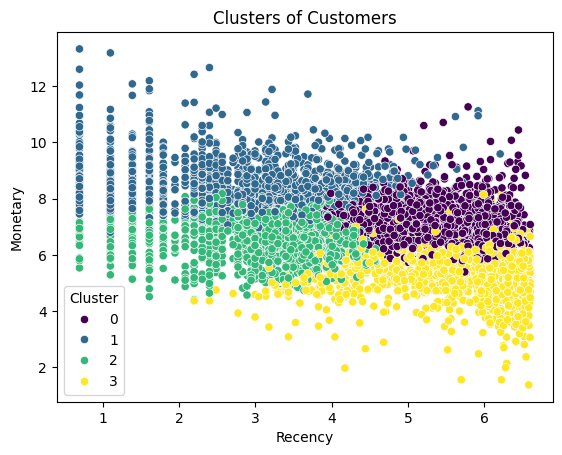


Interpretation: 
This scatter plot visualizes the customer clusters based on Recency and Monetary value. 
- **Clusters**: The clusters (distinguished by color) represent groups of customers with similar purchasing behaviors.
- **Insights**: 
  - Customers with lower Recency values (closer to 0) are more recent buyers.
  - Higher Monetary values indicate customers who spend more.
  - Identifying such clusters can help businesses target high-value, loyal customers or re-engage customers who haven't purchased recently.



In [ ]:
# Scatter Plot: Clusters of Customers
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_data, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

# Interpretation for Customer Clusters
print("""
Interpretation:
This scatter plot visualizes the customer clusters based on Recency and Monetary value.
- **Clusters**: The clusters (distinguished by color) represent groups of customers with similar purchasing behaviors.
- **Insights**:
  - Customers with lower Recency values (closer to 0) are more recent buyers.
  - Higher Monetary values indicate customers who spend more.
  - Identifying such clusters can help businesses target high-value, loyal customers or re-engage customers who haven't purchased recently.
""")

# Step 10 ANN Model for Customer Churn Prediction

In [ ]:
print("\nPreparing Data for ANN...")
data['Customer Type'] = rfm_data['Cluster'].apply(lambda x: 1 if x == 0 else 0)  # Example binary target
X = rfm_data[['Recency', 'Frequency', 'Monetary']]
y = rfm_data['Cluster']


Preparing Data for ANN...


# Step 11 Oversample Minority Classes

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Step 12 Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 13 Build ANN Model

In [ ]:
print("\nBuilding ANN Model...")
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # Adjust output units and activation function for multi-class classification
])


Building ANN Model...


# Step 14 Compile Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 15 Train Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3812 - loss: 1.4363 - val_accuracy: 0.7160 - val_loss: 0.6818
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6481 - loss: 0.7576 - val_accuracy: 0.7480 - val_loss: 0.5448
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 0.6550 - val_accuracy: 0.7618 - val_loss: 0.5031
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5881 - val_accuracy: 0.7625 - val_loss: 0.4832
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.5427 - val_accuracy: 0.7908 - val_loss: 0.4480
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.5210 - val_accuracy: 0.7930 - val_loss: 0.4338
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7733 - loss: 0.5024 - val_accuracy: 0.8090 - val_loss: 0.4083
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.4702 - val_accu

# Step 16 Evaluate Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0603
Test Loss: 0.0580
Test Accuracy: 0.9811


In [ ]:
# Generate Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Cluster {i}' for i in range(4)]))


Classification Report:
              precision    recall  f1-score   support

   Cluster 0       0.98      0.96      0.97       324
   Cluster 1       1.00      0.97      0.99       345
   Cluster 2       0.98      0.99      0.98       336
   Cluster 3       0.97      1.00      0.98       372

    accuracy                           0.98      1377
   macro avg       0.98      0.98      0.98      1377
weighted avg       0.98      0.98      0.98      1377



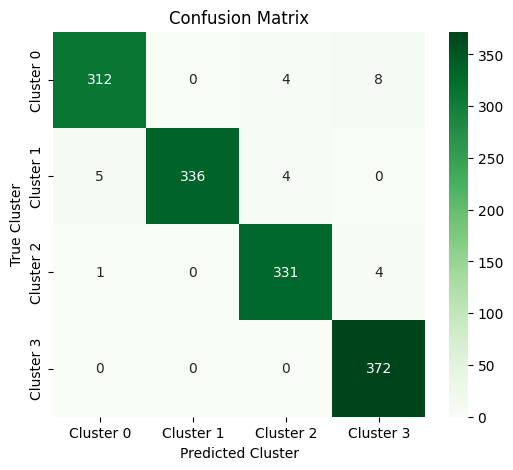

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f'Cluster {i}' for i in range(4)],
            yticklabels=[f'Cluster {i}' for i in range(4)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.show()

# Step 17 Visualize Training History

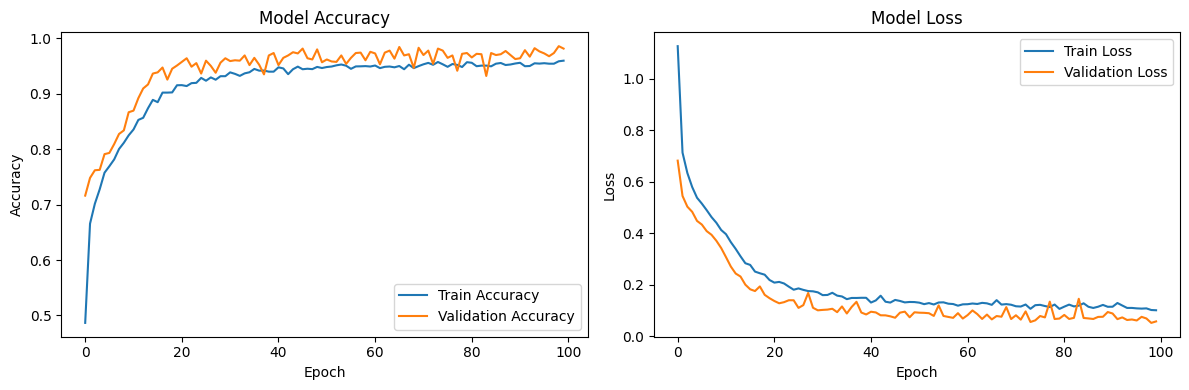


Interpretation: 
This visualization provides insights into the training and validation process of the ANN model.

1. **Model Accuracy**:
   - The 'Train Accuracy' curve shows how well the model performs on the training dataset.
   - The 'Validation Accuracy' curve reflects the model's performance on unseen data.
   - A convergence between the two curves indicates that the model generalizes well, whereas a significant gap might indicate overfitting or underfitting.

2. **Model Loss**:
   - The 'Train Loss' curve shows the error during training.
   - The 'Validation Loss' curve indicates the error on the validation dataset.
   - A decreasing trend for both curves signifies proper learning. If the validation loss increases while training loss decreases, it may suggest overfitting.

By analyzing these trends, we can identify opportunities to improve the model through adjustments like regularization or additional data preprocessing.



In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Interpretation for Training History
print("""
Interpretation:
This visualization provides insights into the training and validation process of the ANN model.

1. **Model Accuracy**:
   - The 'Train Accuracy' curve shows how well the model performs on the training dataset.
   - The 'Validation Accuracy' curve reflects the model's performance on unseen data.
   - A convergence between the two curves indicates that the model generalizes well, whereas a significant gap might indicate overfitting or underfitting.

2. **Model Loss**:
   - The 'Train Loss' curve shows the error during training.
   - The 'Validation Loss' curve indicates the error on the validation dataset.
   - A decreasing trend for both curves signifies proper learning. If the validation loss increases while training loss decreases, it may suggest overfitting.

By analyzing these trends, we can identify opportunities to improve the model through adjustments like regularization or additional data preprocessing.
""")

# Step 18 Recommendations

In [ ]:
print("\nRecommendations:")
print("1. Focus on Cluster 0 for targeted marketing as they represent high-value customers.")
print("2. Implement loyalty programs for low-frequency but high-monetary customers.")
print("3. Use ANN predictions to identify potential churners and prevent losses.")


Recommendations:
1. Focus on Cluster 0 for targeted marketing as they represent high-value customers.
2. Implement loyalty programs for low-frequency but high-monetary customers.
3. Use ANN predictions to identify potential churners and prevent losses.
